## Object
An e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 
## Our goal 
Find out the two best markets to advertise our product in.
## Data Source

To avoid spending money on organizing a survey, we'll first try to make use of existing data to determine whether we can reach any reliable result.
* freeCodeCamp's 2017 New Coder Survey. 

freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey') with 136 columns and 18,175 rows.

In [1]:
import pandas as pd
import numpy as np
fcc_survey= pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

print(fcc_survey.shape)
pd.options.display.max_columns = 150 # to avoid truncated output 
fcc_survey.head()

(18175, 136)


C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Clean Data

As we only want to focus on reponding question: two potential markets to invest in so we wil will on `Age`, `CountryLive`, `JobRoleInterest`,`MoneyForLearning`, `MonthsProgramming`.

In [2]:
survey=fcc_survey[['NetworkID','Age', 'CountryLive', 'JobRoleInterest','MoneyForLearning', 'MonthsProgramming']]
survey.columns=['network_id','age', 'country','job_interested', 'learning_fee', 'programming_duration']
print(survey.columns)

Index(['network_id', 'age', 'country', 'job_interested', 'learning_fee',
       'programming_duration'],
      dtype='object')


In [3]:
## check for null value
survey.isnull().sum()

network_id                  0
age                      2808
country                  2839
job_interested          11183
learning_fee             1598
programming_duration     1091
dtype: int64

I realize that every column has N/A value.Since we are interested in people have job interested for web developer and game, so will need to drop na value of job interested

##### Check for duplicated value if any

In [4]:
survey[survey.duplicated()]

,network_id,age,country,job_interested,learning_fee,programming_duration
8176,654d7d6503,22.0,Croatia,NaN,NaN,5.0
10004,48a37af5b0,24.0,United Kingdom,NaN,0.0,0.0
10005,635e865dca,NaN,NaN,NaN,NaN,NaN
10013,1c0b6c0f6e,30.0,Croatia,NaN,0.0,12.0
10734,557aab7d51,NaN,NaN,NaN,0.0,7.0
11417,3e3d193dde,NaN,NaN,NaN,NaN,NaN
11618,62a697ce7b,NaN,NaN,NaN,NaN,NaN
11755,0872f7036b,NaN,NaN,NaN,NaN,NaN
11873,e3a5a34e6f,NaN,NaN,NaN,0.0,1.0
13468,c4c0b6f9b9,NaN,NaN,NaN,10.0,6.0


Since their job interested is null value, so they will be drop also when we drop null value of job interested

In [5]:
## Figure out whether the sample we have is representative for our population of interest.
survey['job_interested'].value_counts()


Full-Stack Web Developer                                                                                                                                                                                                                                                                    823
  Front-End Web Developer                                                                                                                                                                                                                                                                   450
  Data Scientist                                                                                                                                                                                                                                                                            152
Back-End Web Developer                                                                                                                  

People are interested in one or more than one subject.
#### Generate a frequency table for the variable describing the number of options.

In [6]:
job_interested=survey['job_interested'].dropna().str.split(',') ## indicate each object in series in string treated as a string
job_interested.apply(lambda x:len(x)).value_counts(normalize=True)*100

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: job_interested, dtype: float64

we see that only 31.6% people have a clear idea about what they'd like to work in, while the vast majority of students have mixed interests.

In [7]:
## Create a frequency table for each individual job
jobs=survey['job_interested'].str.split(',', expand=True) 
jobs.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Full-Stack Web Developer,None,None,None,None,None,None,None,None,None,None,None,None
2,Front-End Web Developer,Back-End Web Developer,DevOps / SysAdmin,Mobile Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None
3,Front-End Web Developer,Full-Stack Web Developer,Back-End Web Developer,None,None,None,None,None,None,None,None,None,None
4,Full-Stack Web Developer,Information Security,Mobile Developer,Front-End Web Developer,Back-End Web Developer,None,None,None,None,None,None,None,None


In [8]:
jobs_melt=pd.melt(jobs, value_vars=[0,1,2,3,4,5,6,7,8,9,10,11,12])
jobs_melt.head(5)

,variable,value
0,0,NaN
1,0,Full-Stack Web Developer
2,0,Front-End Web Developer
3,0,Front-End Web Developer
4,0,Full-Stack Web Developer


In [9]:
jobs_melt['value']=jobs_melt['value'][jobs_melt['value'].notnull()].str.strip()## data has none value and pandas doesn't recognize it as na value,
## so need to use notnull()
jobs_melt['value'].value_counts()

Full-Stack Web Developer    4198
Front-End Web Developer     3533
Back-End Web Developer      2772
Mobile Developer            2304
Data Scientist              1643
                            ... 
Not Sure                       1
Web developer                  1
Robotics and AI Engineer       1
Software Specialist            1
IT specialist                  1
Name: value, Length: 208, dtype: int64

In [10]:
top12= (jobs_melt['value'].value_counts(normalize=True)*100).head(12)
list_top12 =list(top12.index)
list_top12

['Full-Stack Web Developer',
 'Front-End Web Developer',
 'Back-End Web Developer',
 'Mobile Developer',
 'Data Scientist',
 'Game Developer',
 'User Experience Designer',
 'Information Security',
 'Data Engineer',
 'DevOps / SysAdmin',
 'Product Manager',
 'Quality Assurance Engineer']

In [11]:
jobs_melt['value']=jobs_melt['value'].dropna().apply(lambda x: x if x in list_top12 else 'others')
popular_jobs=jobs_melt['value'].value_counts(normalize=True)*100
popular_jobs

Full-Stack Web Developer      18.575221
Front-End Web Developer       15.632743
Back-End Web Developer        12.265487
Mobile Developer              10.194690
Data Scientist                 7.269912
Game Developer                 7.203540
User Experience Designer       6.500000
Information Security           5.867257
Data Engineer                  5.522124
DevOps / SysAdmin              4.101770
Product Manager                3.601770
Quality Assurance Engineer     2.203540
others                         1.061947
Name: value, dtype: float64

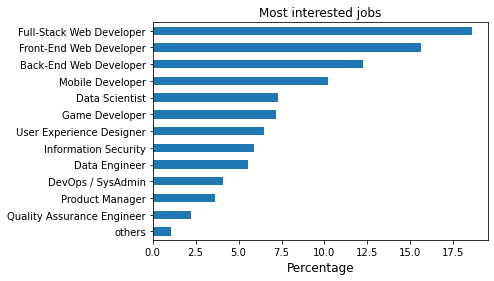

In [12]:
import matplotlib.pyplot as plt
popular_jobs.sort_values().plot.barh(title='Most interested jobs')
plt.xlabel('Percentage', fontsize=12)
plt.show()

it is good that top4 most prefered jobs are web/mobile related asThe focus of company.Calculate actual how many people are interested in at least one of these two subjects

In [13]:
import re
web_game_boolean=survey['job_interested'].str.contains(r"web|game", flags=re.I)
web_game_interested=web_game_boolean.value_counts(normalize=True)*100
print(web_game_interested)

True     86.384439
False    13.615561
Name: job_interested, dtype: float64


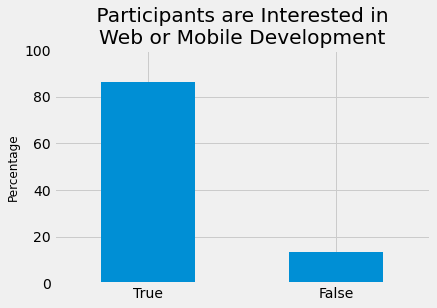

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
web_game_interested.plot.bar(title=" Participants are Interested in \nWeb or Mobile Development", rot=0)
plt.ylabel('Percentage',fontsize = 12)
plt.ylim([0,100])
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

We can start with finding out:
* where these new coders are located
* what are the densities (how many coders there are) for each location.

### Top countries of learner and density
will work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

In [15]:
## drop N/A value data of Role Job Interested:
new_survey=survey[survey['job_interested'].notnull()]
web_game_survey=new_survey[new_survey['job_interested'].str.contains(r"web|game",flags=re.I)]
absolute_freq=web_game_survey['country'].value_counts()
relative_freq=web_game_survey['country'].value_counts(normalize=True)*100
# Display the frequency tables in a more readable format
country_freq=pd.DataFrame(data = {'Absolute frequency': absolute_freq, 
                     'Percentage': relative_freq}
            )
print(country_freq)

                          Absolute frequency  Percentage
United States of America                2692   45.496028
India                                    440    7.436201
United Kingdom                           282    4.765929
Canada                                   219    3.701200
Poland                                   122    2.061856
...                                      ...         ...
Papua New Guinea                           1    0.016900
Liberia                                    1    0.016900
Qatar                                      1    0.016900
Aruba                                      1    0.016900
Gambia                                     1    0.016900

[132 rows x 2 columns]


Text(0, 0.5, '')

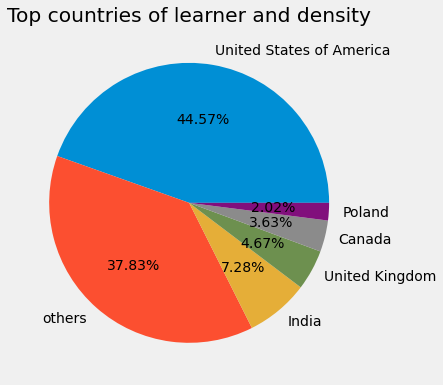

In [16]:
top5=list(country_freq.head(5).index)
country_update=web_game_survey['country'].apply(lambda x: x if x in top5 else 'others')
country_update.value_counts().plot.pie(title='Top countries of learner and density', figsize=(6,6),autopct='%.2f%%')
plt.ylabel('')


From above table, we seen that US have major interested people - 45.5% while the send country - India only takes 7.4% which is not too far from UK(4.7%) and Canada(3.7%)

### Amount of money student spends per month
Analyse:The `learning_fee` column describes in USD the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

Narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:
* they are at top 4 of highest frequencies
* their official language is English- the language of the courses


In [17]:
top_country=web_game_survey[web_game_survey['country'].apply(lambda x:x in ['United States of America',
                                                                              'India',
                                                                              'United Kingdom',
                                                                              'Canada'])]
(top_country['programming_duration']==0).value_counts()

False    3519
True      114
Name: programming_duration, dtype: int64

In [18]:
## replace value 0 in programming_duration to 1
## remove null value of both programming_duration and learning_fee as it will impact on mean value calculation
new_top_country=top_country[top_country['programming_duration'].notnull()& top_country['learning_fee'].notnull()].copy()
new_top_country['programming_duration'].replace(0,1,inplace=True) ## important to have inplace=True
new_top_country['money_per_month']=new_top_country['learning_fee']/new_top_country['programming_duration']
new_top_country.pivot_table(index='country', values='money_per_month', aggfunc=[np.mean,np.median])

,mean,median
,money_per_month,money_per_month
country,,
Canada,124.300579,0.000000
India,126.766017,0.000000
United Kingdom,48.674390,0.000000
United States of America,249.902327,4.166667


Need to remove spend per month at 0.
The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

### Generate four box plots on the same figure to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable

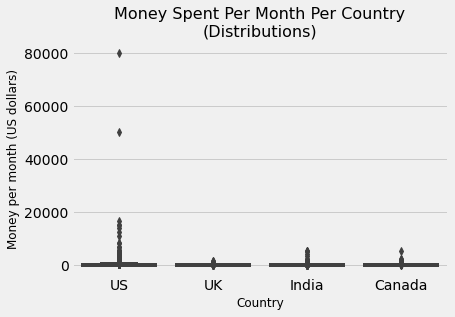

In [19]:
import seaborn as sns
sns.boxplot(x='country', y='money_per_month',data=new_top_country)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])# avoids tick labels overlap
plt.show()

### Dealing with outliers

In [20]:
##it is hard to see the chart in detail because of outlier at about 50,000 and 80,000, so remove these outliers:
remove_outlier=new_top_country[(new_top_country['money_per_month']<20000)& (new_top_country['money_per_month']>0)]
remove_outlier.groupby('country')['money_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Canada,99.0,252.367842,652.732210,0.416667,8.333333,25.000000,133.333333,5000.000000
India,172.0,288.171585,820.163804,0.138889,5.000000,19.375000,127.083333,5000.000000
United Kingdom,123.0,98.535960,233.141522,0.050000,8.333333,25.000000,68.333333,1400.000000
United States of America,1430.0,352.099580,1180.729677,0.033333,10.000000,33.333333,166.666667,16666.666667


The result is much better with median(50%) is now >0.

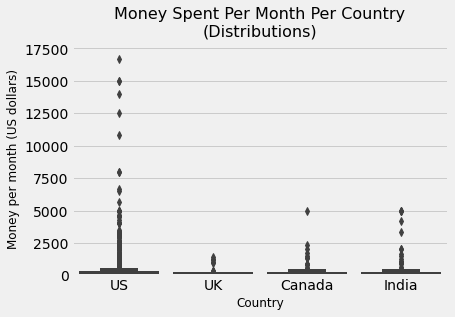

In [21]:
sns.boxplot(x='country', y='money_per_month',data=remove_outlier)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(range(4), ['US', 'UK', 'Canada', 'India'])# avoids tick labels overlap
plt.ylim(0,18000)
plt.show()

Still quite unclear. The number of outliers can tell us that participants could take into account money spent on primary univercity or bootcamps.

Since 75% our customers spends less than 167 USD per month. Let's try to determine our potential customers as those, who spent less than 250 USD per month and see how it affects on the size of our sample.


In [22]:
remove_outlier_vs2=new_top_country[(new_top_country['money_per_month']<250)& (new_top_country['money_per_month']>0)]
remove_outlier_vs2.groupby('country')['money_per_month'].describe()


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Canada,78.0,32.757410,42.090082,0.416667,5.729167,16.666667,33.333333,208.333333
India,141.0,36.256590,50.549945,0.138889,4.166667,12.500000,48.000000,200.000000
United Kingdom,113.0,42.471596,52.120318,0.050000,8.333333,20.000000,60.000000,225.000000
United States of America,1124.0,42.809642,51.429328,0.033333,7.944444,20.833333,60.000000,233.823529


Text(0.5, 0, 'USD')

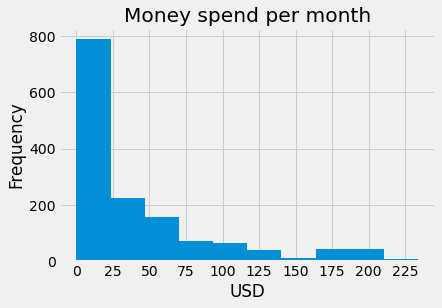

In [23]:
remove_outlier_vs2['money_per_month'].plot.hist(grid=True, xticks=range(0,250,25), title='Money spend per month')
plt.xlabel('USD')

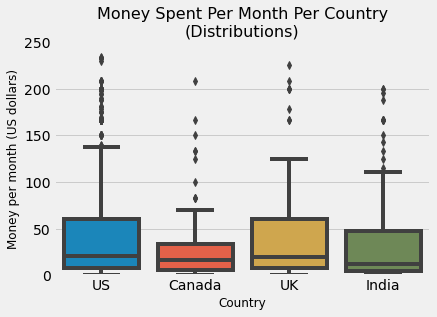

In [24]:
sns.boxplot(x='country', y='money_per_month',data=remove_outlier_vs2)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(range(4), ['US', 'Canada', 'UK', 'India'])# avoids tick labels overlap
plt.ylim(0,250)
plt.show()

## Choosing the Two Best Markets
Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month. 
Afer remove outliers, UK is the best for second option because:
* it is at 3rd position for highes potential client (4.67%)
* The amount of people spending for learning is at top 2, only lower than US. 
